In [53]:
# Dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
# Bring in london_merged.csv as a DF

bikes_df = pd.read_csv('london_merged.csv')
bikes_df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [55]:
# Clean up for easier reading

new_cols_dict = {
    'cnt':'count',
    't1':'temp_real_C',
    't2':'temp_feels_like_C',
    'hum':'humidity_pct',
    'wind_speed':'wind_speed_C',
    'weather_code':'weather'
}

bikes_df.rename(new_cols_dict,axis = 1, inplace=True)
bikes_df.head(1)

,timestamp,count,temp_real_C,temp_feels_like_C,humidity_pct,wind_speed_C,weather,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0


In [56]:
# Make 'humidity_pct' actually percentage
bikes_df['humidity_pct'] = bikes_df['humidity_pct']/100
bikes_df['humidity_pct']

0        0.930
1        0.930
2        0.965
3        1.000
4        0.930
         ...  
17409    0.810
17410    0.810
17411    0.785
17412    0.760
17413    0.760
Name: humidity_pct, Length: 17414, dtype: float64

In [57]:
# Creation of mappings for 'season' and 'weather'

season_dict = {
    '0.0':'spring',
    '1.0':'summer',
    '2.0':'fall',
    '3.0':'winter'
}

weather_dict = {
    '1.0':'Clear',
    '2.0':'Scattered clouds',
    '3.0':'Broken clouds',
    '4.0':'Cloudy',
    '7.0':'Rain',
    '10.0':'Rain with thunderstorm',
    '26.0':'Snowfall'
}

# map dictionaries to numerical values

bikes_df['season'] = bikes_df['season'].astype('str')
bikes_df['season'] = bikes_df['season'].map(season_dict)

bikes_df['weather'] = bikes_df['weather'].astype('str')
bikes_df['weather'] = bikes_df['weather'].map(weather_dict)

In [58]:
bikes_df.head(1)

,timestamp,count,temp_real_C,temp_feels_like_C,humidity_pct,wind_speed_C,weather,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,0.93,6.0,Broken clouds,0.0,1.0,winter


In [59]:
# Save to an Excel file

bikes_df.to_excel('bikes_final.xlsx', sheet_name='Data')

# Actual Analysis

## Let's look into what the data says

In [60]:
# Shape and columns

bikes_df.shape, bikes_df.columns.to_list()

((17414, 10),
 ['timestamp',
  'count',
  'temp_real_C',
  'temp_feels_like_C',
  'humidity_pct',
  'wind_speed_C',
  'weather',
  'is_holiday',
  'is_weekend',
  'season'])

In [61]:
# Describe

bikes_df.describe(), bikes_df.dtypes

(              count   temp_real_C  temp_feels_like_C  humidity_pct  \
 count  17414.000000  17414.000000       17414.000000  17414.000000   
 mean    1143.101642     12.468091          11.520836      0.723250   
 std     1085.108068      5.571818           6.615145      0.143132   
 min        0.000000     -1.500000          -6.000000      0.205000   
 25%      257.000000      8.000000           6.000000      0.630000   
 50%      844.000000     12.500000          12.500000      0.745000   
 75%     1671.750000     16.000000          16.000000      0.830000   
 max     7860.000000     34.000000          34.000000      1.000000   
 
        wind_speed_C    is_holiday    is_weekend  
 count  17414.000000  17414.000000  17414.000000  
 mean      15.913063      0.022051      0.285403  
 std        7.894570      0.146854      0.451619  
 min        0.000000      0.000000      0.000000  
 25%       10.000000      0.000000      0.000000  
 50%       15.000000      0.000000      0.000000  
 7

In [62]:
# Value Counts for every column

for column in bikes_df.columns:
    print(bikes_df[column].value_counts())

timestamp
2015-01-04 00:00:00    1
2016-05-04 12:00:00    1
2016-05-04 18:00:00    1
2016-05-04 17:00:00    1
2016-05-04 16:00:00    1
                      ..
2015-09-03 17:00:00    1
2015-09-03 18:00:00    1
2015-09-03 19:00:00    1
2015-09-03 20:00:00    1
2017-01-03 23:00:00    1
Name: count, Length: 17414, dtype: int64
count
46      46
53      39
33      36
70      36
120     36
        ..
3022     1
3112     1
1338     1
3270     1
2220     1
Name: count, Length: 3781, dtype: int64
temp_real_C
 13.000000    969
 12.000000    822
 9.000000     807
 14.000000    802
 11.000000    779
             ... 
 31.500000      3
 31.000000      3
 34.000000      2
-1.500000       1
 10.333333      1
Name: count, Length: 73, dtype: int64
temp_feels_like_C
 13.000000    969
 12.000000    821
 14.000000    802
 11.000000    774
 16.000000    729
             ... 
 33.000000      2
-5.500000       1
-5.000000       1
-6.000000       1
 10.333333      1
Name: count, Length: 82, dtype: int64
humid

In [142]:
# Let's create month, day, date, and hour columns for temporal analysis

bikes_df['timestamp'] = pd.to_datetime(bikes_df['timestamp'])

bikes_df['year'] = bikes_df['timestamp'].dt.year
bikes_df['month'] = bikes_df['timestamp'].dt.month_name()
bikes_df['month_num'] = bikes_df['timestamp'].dt.month
bikes_df['day'] = bikes_df['timestamp'].dt.day_name()
bikes_df['day_num'] = (bikes_df['timestamp'].dt.dayofweek + 1) % 7
bikes_df['date'] = bikes_df['timestamp'].dt.date
bikes_df['hour'] = bikes_df['timestamp'].dt.hour
bikes_df.head()

,timestamp,count,temp_real_C,temp_feels_like_C,humidity_pct,wind_speed_C,weather,is_holiday,is_weekend,season,year,month,month_num,day,date,hour,day_num
0,2015-01-04 00:00:00,182,3.0,2.0,0.930,6.0,Broken clouds,0.0,1.0,winter,2015,January,1,Sunday,2015-01-04,0,0
1,2015-01-04 01:00:00,138,3.0,2.5,0.930,5.0,Clear,0.0,1.0,winter,2015,January,1,Sunday,2015-01-04,1,0
2,2015-01-04 02:00:00,134,2.5,2.5,0.965,0.0,Clear,0.0,1.0,winter,2015,January,1,Sunday,2015-01-04,2,0
3,2015-01-04 03:00:00,72,2.0,2.0,1.000,0.0,Clear,0.0,1.0,winter,2015,January,1,Sunday,2015-01-04,3,0
4,2015-01-04 04:00:00,47,2.0,0.0,0.930,6.5,Clear,0.0,1.0,winter,2015,January,1,Sunday,2015-01-04,4,0


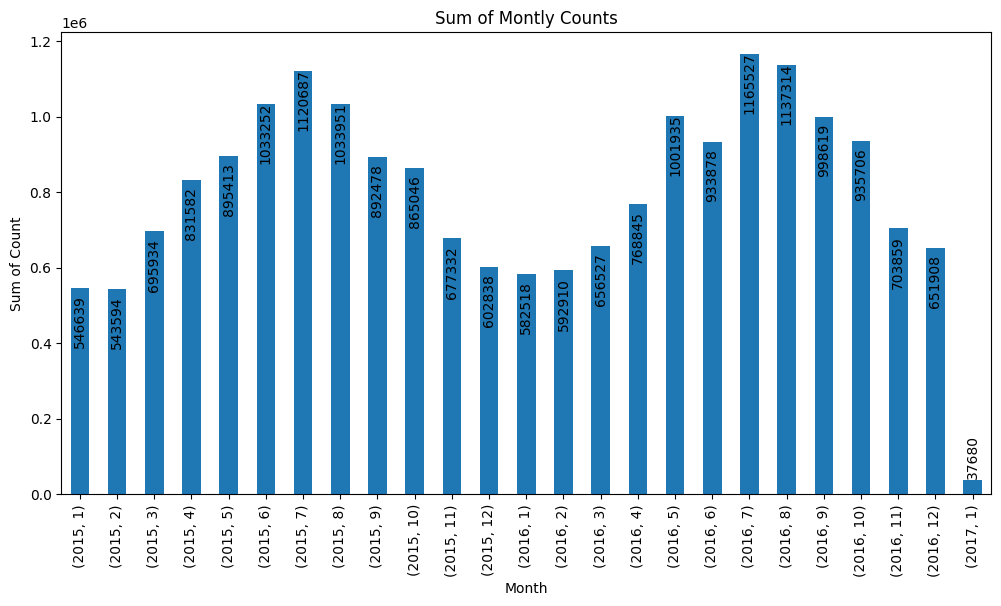

In [110]:
# Let's look at monthly bike numbers

monthly = bikes_df.groupby(['year','month_num'])
month_dlabel = monthly['count'].sum()
monthly_sum = monthly['count'].sum().plot(kind= 'bar', figsize=(12,6))

for i, v in enumerate(month_dlabel):
    if v < 151000:
        monthly_sum.text(i, v + 10000, str(v), ha='center', rotation = 90)
    else:
        monthly_sum.text(i, v - 151000, str(v), ha='center', rotation = 90)  
plt.xlabel('Month')
plt.ylabel('Sum of Count')
plt.title('Sum of Montly Counts')
plt.show()

### Looks like the counts has a correlation with temperature, let's look at the temperature and combine the graphs to see if this is true. Also, January 2017 (2017, 1) is significantly smaller, because that's the end of the dataset

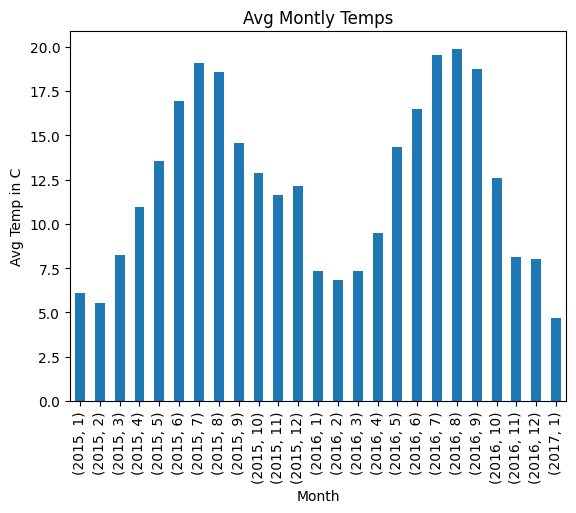

In [114]:
# Let's look at monthly average temperatures

monthly = bikes_df.groupby(['year','month_num'])
month_dlabel = monthly['temp_real_C'].mean()
monthly_avg_temp = monthly['temp_real_C'].mean().plot(kind= 'bar')

plt.xlabel('Month')
plt.ylabel('Avg Temp in C')
plt.title('Avg Montly Temps')
plt.show()

Text(0, 0.5, 'Temp C')

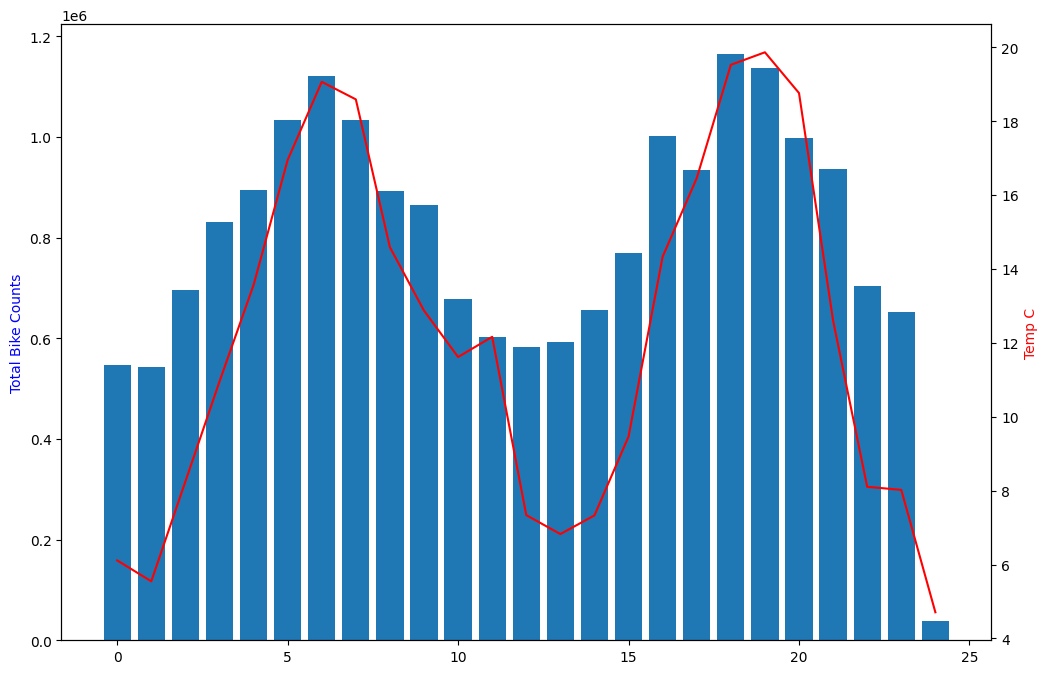

In [135]:
# Combine the previous graphs, let's make count sums into bars and temperature into a line for ease of reading

monthly = bikes_df.groupby(['year','month_num'])
x = np.arange(len(monthly))
y1 = monthly['count'].sum()
y2 = monthly['temp_real_C'].mean()
fig, ax1 = plt.subplots(figsize = (12,8))
ax1.bar(x,y1)
ax1.set_ylabel('Total Bike Counts', color = 'blue')

ax2 = ax1.twinx()
ax2.plot(x,y2,color = 'red')
ax2.set_ylabel('Temp C', color = 'red')

### Here we can easily see the relationship of Total Bike Counts to the average temperature of the month, as the temperature rises, the number of bikes used is increased.

### Let's do a quick scatterplot to see the relationship between total bike counts and the temperature.

[]

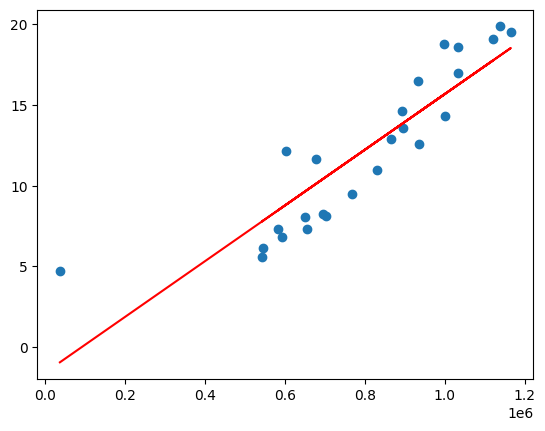

In [186]:
# Scatterplot between total bike counts and the temperature

plt.scatter(x = y1, y = y2)

slope, intercept = np.polyfit(y1, y2, 1)
plt.plot(y1, slope*y1 + intercept, color = 'red')
plt.plot()


# Day of the Week and how it affects bike numbers

### We saw how the average temperature of the month affected bike numbers, but on a weekly basis, how does the day of the week affect bike numbers?

#### I believe that bike numbers would increase during the weekend, for leisure.

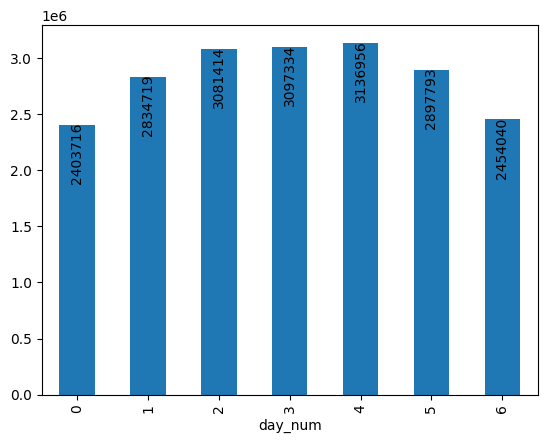

In [158]:
# Since we created the "day" column earlier, we can use that as the groupby

day_of_week = bikes_df.groupby('day_num')['count'].sum()
ax = day_of_week.plot(kind='bar')
for i, v in enumerate(day_of_week):
    ax.text(i, v-500000, str(v), ha='center', rotation = 90)
plt.show()

#### Interestingly, there's actually more bike usage during the week, which now makes more sense, because they are probably being used more for transportation to and from work. To prove this theory, let's look at the hourly bike usage per day.

([<matplotlib.axis.XTick at 0x172117d7b50>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

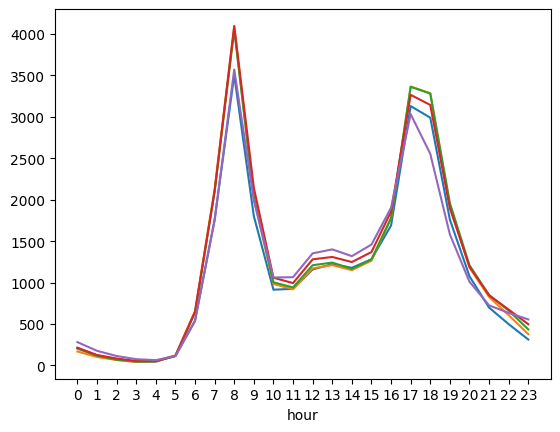

In [182]:
# Create a line plot where each line represents a day

weekday_dict = {
    'Monday':1,
    'Tuesday':2,
    'Wednesday':3,
    'Thursday':4,
    'Friday':5
}

for day_name, day in weekday_dict.items():
    day_bike_df = bikes_df[bikes_df['day_num'] == day]
    day_bike_sum = day_bike_df.groupby('hour')['count'].mean()
    day_bike_sum.plot()

plt.xticks(range(len(day_bike_df.groupby('hour'))))


### The peak usage of bikes is around hours 8, 17, and 18, which are the times people usually go to work and leave for home, so it appears that a signifcant reason why people use the bikes is mainly for transportation to and from work.

#### Side note: That slight bump at around hours 12 and 13 is probably for the lunch rush. Cool

# Now for the Weather
### Now I want to see how the weather can affect the bike numbers.

In [188]:
# Let's do a quick value count to see how many instances for each weather type.

bikes_df['weather'].value_counts()

weather
Clear                     6150
Scattered clouds          4034
Broken clouds             3551
Rain                      2141
Cloudy                    1464
Snowfall                    60
Rain with thunderstorm      14
Name: count, dtype: int64

In [193]:
# Let's take a look at the average bike count for each weather type

bikes_df.groupby('weather')['count'].mean()

weather
Broken clouds             1195.124472
Clear                     1162.088943
Cloudy                     635.230874
Rain                       712.966371
Rain with thunderstorm     583.428571
Scattered clouds          1496.177491
Snowfall                   250.850000
Name: count, dtype: float64

#### 